# Using other devices

Qiskit is a common framework that allows to interact with different resources. Different Cloud providers offer a set of quantum devices that can be used to run those codes initially defined or trained locally. For example we will try to use IonQ's devices by means of an Azure subscription:

## IonQ

IonQ offers a completely different architecture with an all-to-all topology. Their devices can be tested by means of Azure's offering with up to 11 qubit device options. https://docs.microsoft.com/en-us/azure/quantum/provider-ionq

| Measure | Average time duration (µs) |
|---------|----------------------------|
|    T1   |            >10^7           |
|    T2   |  	    200,000            |
| Single-qubit gate | 	10 |
| Two-qubit gate |	210 |
| Readout |	100 | 
| Register reset | 25 |
| Coherence time / gate duration | 1667 |

### System fidelity

| Operation	| Average fidelity |
|-----------|------------------|
| Single-qubit gate |	99.35% (SPAM corrected) |
| Two-qubit gate |	96.02% (not SPAM corrected) |
| SPAM |	99.3 - 99.8% |
| Geometric mean op|	98.34% |

Let's first conect to our Azure Quantum Workspace:

![azurequantum](../assets/azure-workspace.png)

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider

from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = os.environ['RESOURCE'],
    location = "eastus"
)

In [3]:
print([backend.name() for backend in provider.backends()])

['honeywell.hqs-lt-s1', 'honeywell.hqs-lt-s1-apival', 'honeywell.hqs-lt-s2', 'honeywell.hqs-lt-s2-apival', 'honeywell.hqs-lt-s1-sim', 'ionq.qpu', 'ionq.simulator']


Let's load the circuit, taking the QASM code we created before.

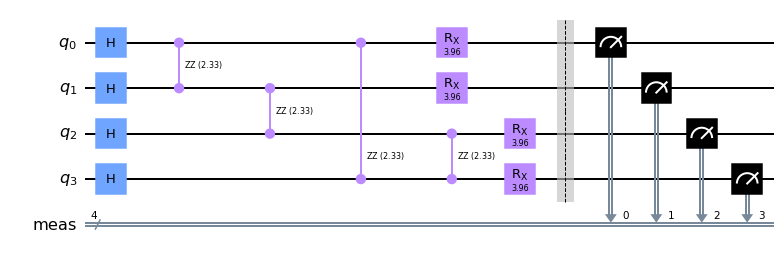

In [4]:
qc = QuantumCircuit.from_qasm_file('mycircuit.qasm')
qc.draw('mpl')

In [5]:
simulator_backend = provider.get_backend("ionq.qpu")
job = simulator_backend.run(qc, shots=1024)
job_monitor(job)

Job Status: job has successfully run


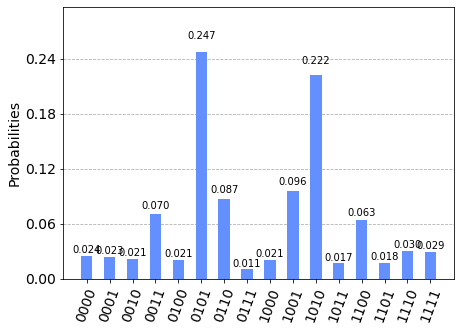

In [6]:
from qiskit.visualization import plot_histogram

result = job.result()
plot_histogram(result.get_counts())

In [8]:
counts = result.get_counts()
num_0101 = counts['0101']
print(f'Probability of getting the result 0101 is {num_0101/1024}')

Probability of getting the result 0101 is 0.2470703125


We can see how the output differs from previous runs and due to the nature of the device (errors, connectivity, etc.)